In [1]:
import pandas as pd

df = pd.read_csv('C:/Users/gregorio/TCC-CD-USP/archives/df_model_V3.csv')
df.head()

,companycode,ano,periodo,ativos_circulantes,ativos_não_circulantes,total_de_ativos,passivos_circulantes,passivos_não_circulantes,total_do_passivo_e_patrimônico_líquido,patrimônio_líquido,...,fco_divida,fcf_divida,cobertura_juros,ebitda_divida,giro_ativos,ciclo_estoques,ciclo_recebiveis,ciclo_pagamentos,ciclo_estoques_dias,score_total
0,ADEL,2008,3_Meses,82082356.0,16000553.0,98082909.0,49511334.0,2498829.0,98082909.0,46072746.0,...,-4.509550,-4.664420,-18.401068,0.841152,0.242154,-2.010322,2.374165,-0.169180,-733.767538,2.2875
1,ADEL,2008,6_Meses,88600612.0,16099148.0,104699760.0,55983895.0,2490529.0,104699760.0,46225336.0,...,-1.489560,-1.540716,-10.595002,0.513515,0.468567,-0.939450,1.268414,-0.101706,-342.899268,2.4125
2,ADEL,2008,9_Meses,94009683.0,15551293.0,109560976.0,54753842.0,2571602.0,109560976.0,52235532.0,...,-1.103726,-1.141631,-6.868930,0.626646,0.687130,-0.628661,0.916802,-0.038461,-229.461288,2.6500
3,ADEL,2008,Anual,45582654.0,15170747.0,60753401.0,8454967.0,2891157.0,60753401.0,49407277.0,...,-13.849306,-14.324928,-4.650982,7.076576,1.231006,-0.729009,0.046323,-0.035645,-266.088413,3.0625
4,ADEL,2009,3_Meses,82082356.0,16000553.0,98082909.0,49511334.0,2498829.0,98082909.0,46072746.0,...,-4.509550,-4.664420,-18.401068,0.841152,0.242154,-2.010322,2.374165,-0.169180,-733.767538,2.2875


In [2]:
df.isnull().sum()

companycode                                              0
ano                                                      0
periodo                                                  0
ativos_circulantes                                       0
ativos_não_circulantes                                   0
total_de_ativos                                          0
passivos_circulantes                                     0
passivos_não_circulantes                                 0
total_do_passivo_e_patrimônico_líquido                   0
patrimônio_líquido                                       0
receita_de_vendas                                        0
lucro_bruto                                              0
ebit                                                     0
lucro_periodo                                            0
lucro_prejuízo_líquido_do_período                        0
despesas_financeiras                                     0
despesas_gerais_e_administrativas                       

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
# Mapa de correlação das features.

df_corr = df.copy()
df_corr = df_corr.drop(columns=['companycode', 'ano', 'periodo', 'data'])

In [9]:
# Calculate correlation matrix
corr_matrix = df_corr.corr()

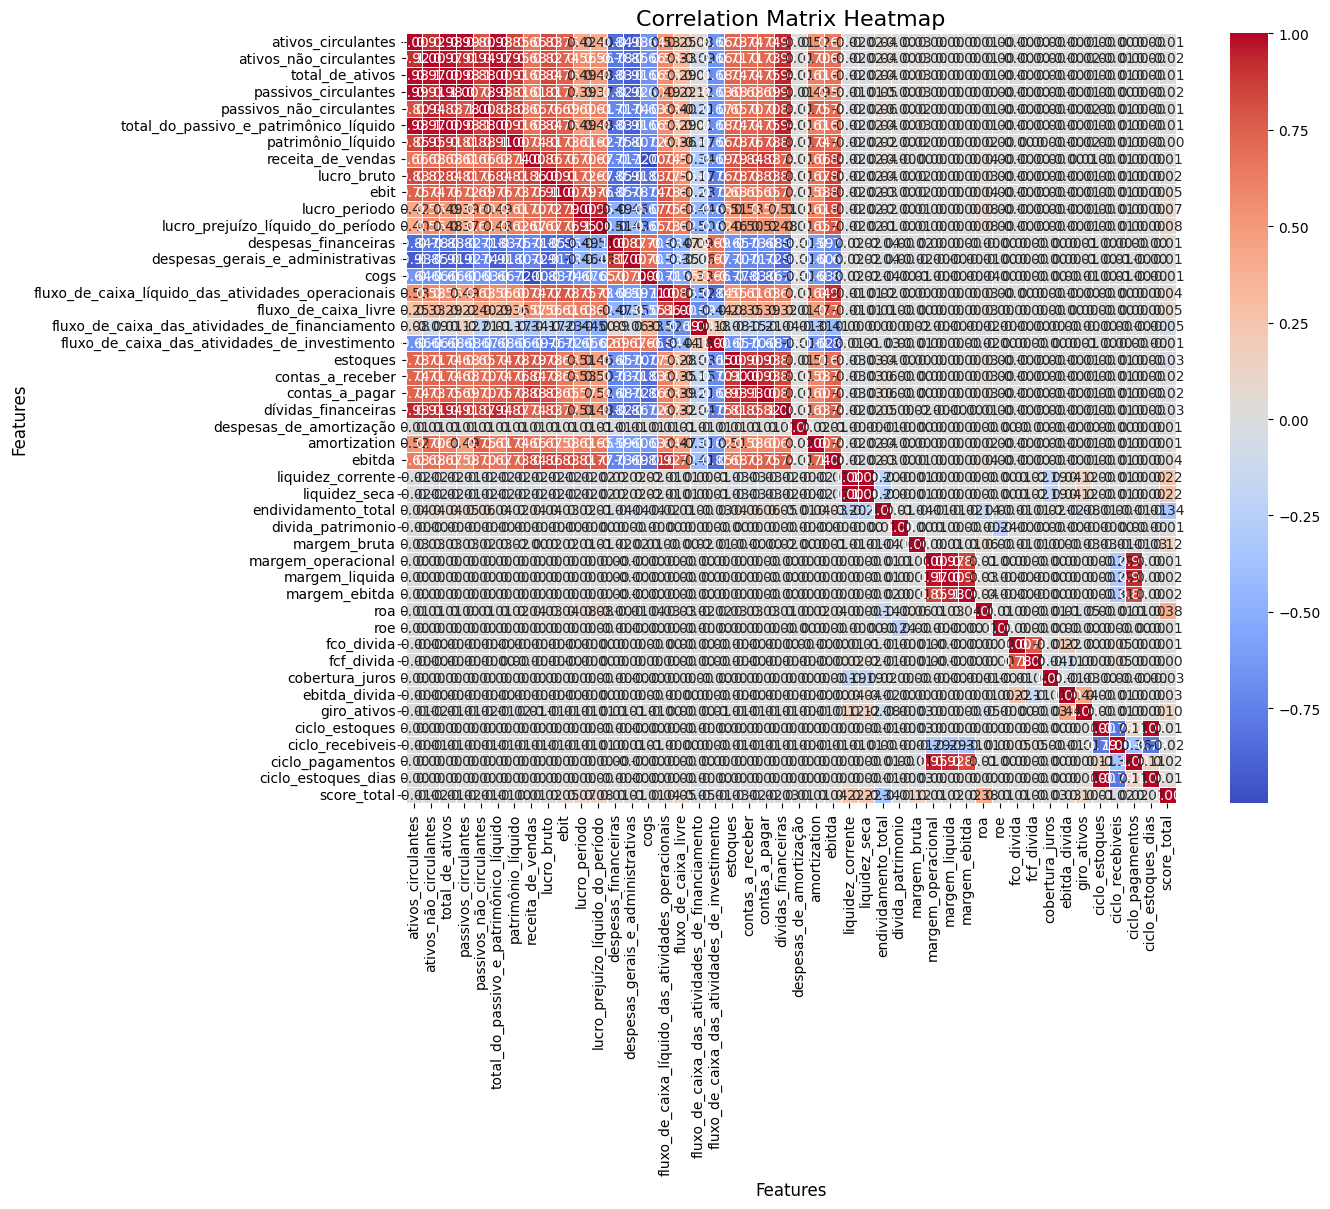

In [10]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, square=True, linewidths=.5)

# Titles and labels
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

plt.show()

In [12]:
corrs=corr_matrix.loc['score_total'].drop('score_total').sort_values(ascending=False)
corrs

roa                                                   0.384325
liquidez_corrente                                     0.223641
liquidez_seca                                         0.222498
margem_bruta                                          0.124942
giro_ativos                                           0.103732
lucro_prejuízo_líquido_do_período                     0.075817
lucro_periodo                                         0.074813
fluxo_de_caixa_livre                                  0.052916
ebit                                                  0.047599
ebitda                                                0.044807
fluxo_de_caixa_líquido_das_atividades_operacionais    0.039963
ebitda_divida                                         0.027601
margem_ebitda                                         0.023032
lucro_bruto                                           0.019584
margem_liquida                                        0.018680
ciclo_pagamentos                                      0

In [13]:
import phik
from phik import resources, report
phi_k_corr = df_corr.phik_matrix()

interval columns not set, guessing: ['ativos_circulantes', 'ativos_não_circulantes', 'total_de_ativos', 'passivos_circulantes', 'passivos_não_circulantes', 'total_do_passivo_e_patrimônico_líquido', 'patrimônio_líquido', 'receita_de_vendas', 'lucro_bruto', 'ebit', 'lucro_periodo', 'lucro_prejuízo_líquido_do_período', 'despesas_financeiras', 'despesas_gerais_e_administrativas', 'cogs', 'fluxo_de_caixa_líquido_das_atividades_operacionais', 'fluxo_de_caixa_livre', 'fluxo_de_caixa_das_atividades_de_financiamento', 'fluxo_de_caixa_das_atividades_de_investimento', 'estoques', 'contas_a_receber', 'contas_a_pagar', 'dívidas_financeiras', 'despesas_de_amortização', 'amortization', 'ebitda', 'liquidez_corrente', 'liquidez_seca', 'endividamento_total', 'divida_patrimonio', 'margem_bruta', 'margem_operacional', 'margem_liquida', 'margem_ebitda', 'roa', 'roe', 'fco_divida', 'fcf_divida', 'cobertura_juros', 'ebitda_divida', 'giro_ativos', 'ciclo_estoques', 'ciclo_recebiveis', 'ciclo_pagamentos', 'cic

In [14]:
phi_k_corr

,ativos_circulantes,ativos_não_circulantes,total_de_ativos,passivos_circulantes,passivos_não_circulantes,total_do_passivo_e_patrimônico_líquido,patrimônio_líquido,receita_de_vendas,lucro_bruto,ebit,...,fco_divida,fcf_divida,cobertura_juros,ebitda_divida,giro_ativos,ciclo_estoques,ciclo_recebiveis,ciclo_pagamentos,ciclo_estoques_dias,score_total
ativos_circulantes,1.000000,0.956728,0.991791,0.985686,0.933780,0.991791,0.917932,0.752920,0.811524,0.761388,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ativos_não_circulantes,0.956728,1.000000,0.968741,0.958251,0.946245,0.968741,0.952957,0.788066,0.799390,0.791097,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
total_de_ativos,0.991791,0.968741,1.000000,0.982275,0.944528,1.000000,0.937298,0.775706,0.789492,0.808381,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
passivos_circulantes,0.985686,0.958251,0.982275,1.000000,0.925098,0.982275,0.899898,0.732821,0.797075,0.810862,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
passivos_não_circulantes,0.933780,0.946245,0.944528,0.925098,1.000000,0.944528,0.925411,0.797614,0.832328,0.802089,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
total_do_passivo_e_patrimônico_líquido,0.991791,0.968741,1.000000,0.982275,0.944528,1.000000,0.937298,0.775706,0.789492,0.808381,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
patrimônio_líquido,0.917932,0.952957,0.937298,0.899898,0.925411,0.937298,1.000000,0.766538,0.836224,0.836432,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
receita_de_vendas,0.752920,0.788066,0.775706,0.732821,0.797614,0.775706,0.766538,1.000000,0.846573,0.935484,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
lucro_bruto,0.811524,0.799390,0.789492,0.797075,0.832328,0.789492,0.836224,0.846573,1.000000,0.871502,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ebit,0.761388,0.791097,0.808381,0.810862,0.802089,0.808381,0.836432,0.935484,0.871502,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [16]:
phik_corrs=phi_k_corr.loc['score_total'].drop('score_total').sort_values(ascending=False)
phik_corrs

margem_bruta                                          0.209304
liquidez_seca                                         0.181138
liquidez_corrente                                     0.180582
roa                                                   0.121702
giro_ativos                                           0.118531
endividamento_total                                   0.097814
lucro_prejuízo_líquido_do_período                     0.081610
ebitda_divida                                         0.066452
fcf_divida                                            0.062567
cobertura_juros                                       0.049830
roe                                                   0.040583
lucro_periodo                                         0.034231
ebitda                                                0.033227
ciclo_recebiveis                                      0.025784
fluxo_de_caixa_líquido_das_atividades_operacionais    0.022795
fco_divida                                            0

In [18]:
# Features and target
X = df.drop(columns=['score_total','companycode','ano','periodo','data'])
y = df['score_total']

In [19]:
X.columns.to_list()

['ativos_circulantes',
 'ativos_não_circulantes',
 'total_de_ativos',
 'passivos_circulantes',
 'passivos_não_circulantes',
 'total_do_passivo_e_patrimônico_líquido',
 'patrimônio_líquido',
 'receita_de_vendas',
 'lucro_bruto',
 'ebit',
 'lucro_periodo',
 'lucro_prejuízo_líquido_do_período',
 'despesas_financeiras',
 'despesas_gerais_e_administrativas',
 'cogs',
 'fluxo_de_caixa_líquido_das_atividades_operacionais',
 'fluxo_de_caixa_livre',
 'fluxo_de_caixa_das_atividades_de_financiamento',
 'fluxo_de_caixa_das_atividades_de_investimento',
 'estoques',
 'contas_a_receber',
 'contas_a_pagar',
 'dívidas_financeiras',
 'despesas_de_amortização',
 'amortization',
 'ebitda',
 'liquidez_corrente',
 'liquidez_seca',
 'endividamento_total',
 'divida_patrimonio',
 'margem_bruta',
 'margem_operacional',
 'margem_liquida',
 'margem_ebitda',
 'roa',
 'roe',
 'fco_divida',
 'fcf_divida',
 'cobertura_juros',
 'ebitda_divida',
 'giro_ativos',
 'ciclo_estoques',
 'ciclo_recebiveis',
 'ciclo_pagamentos

In [20]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Build da pipeline Linear Regression
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

In [22]:
# Fit model
print('Treinando o modelo')
pipeline.fit(X_train, y_train)
print('Modelo treinado com sucesso!')

Treinando o modelo
Modelo treinado com sucesso!


In [23]:
# Predictions
y_pred = pipeline.predict(X_test)

In [24]:
# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

In [25]:
# Results summary
metrics = {
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'MAPE': mape,
    'R²': r2
}

In [26]:
# Display results
metrics_df = pd.DataFrame([metrics])
metrics_df

,MAE,MSE,RMSE,MAPE,R²
0,0.431865,0.283259,0.532221,27.097181,0.337109


In [27]:
# Residuals
residuals = y_test - y_pred

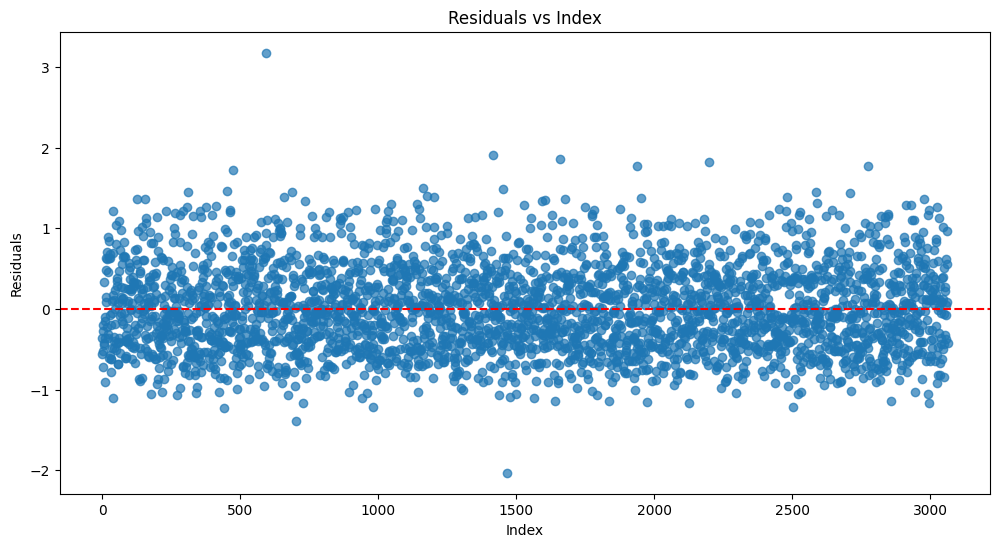

In [28]:
# Plot residuals vs index
plt.figure(figsize=(12, 6))
plt.scatter(range(len(residuals)), residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Index')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.show()


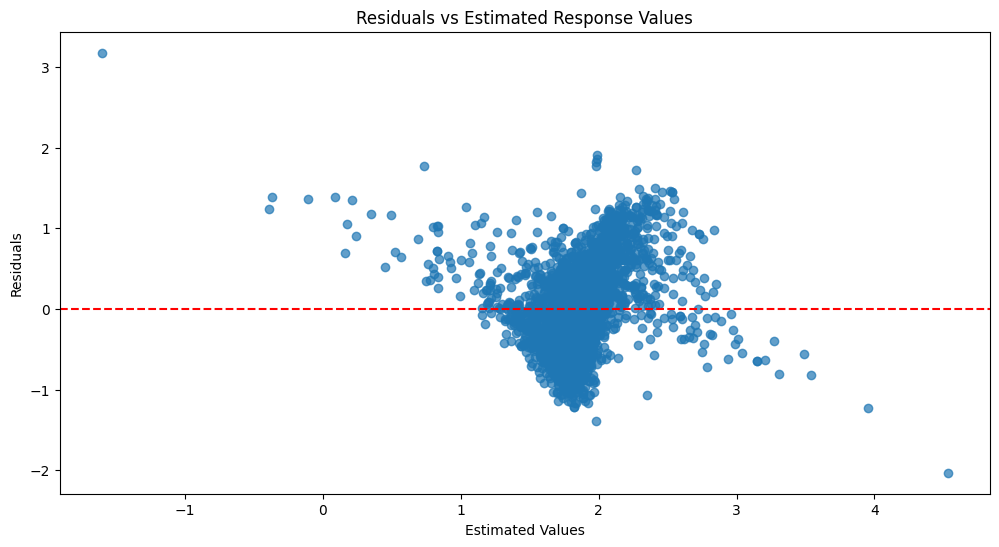

In [29]:
# Residuals vs estimated response values
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Estimated Response Values')
plt.xlabel('Estimated Values')
plt.ylabel('Residuals')
plt.show()

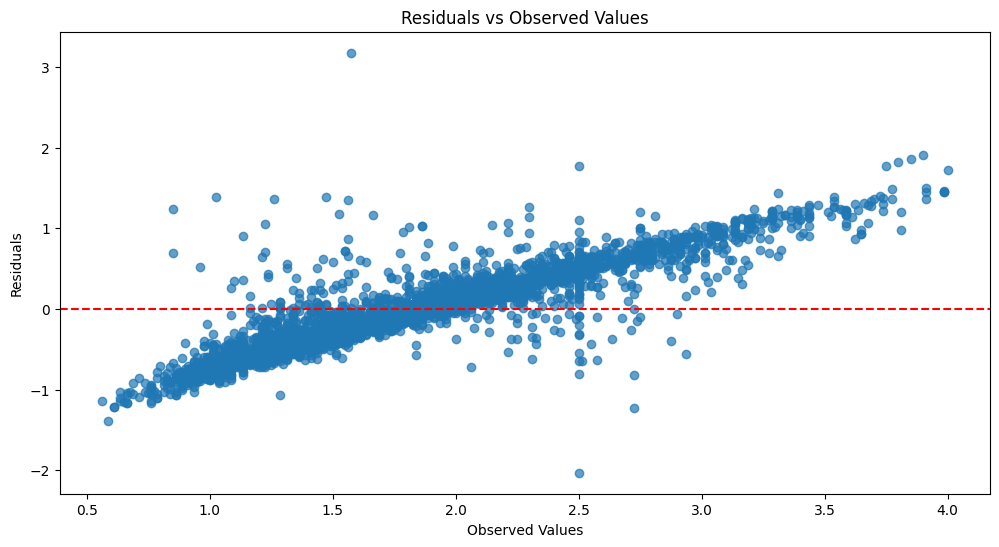

In [30]:
# Residuals vs observations (actual values)
plt.figure(figsize=(12, 6))
plt.scatter(y_test, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Observed Values')
plt.xlabel('Observed Values')
plt.ylabel('Residuals')
plt.show()

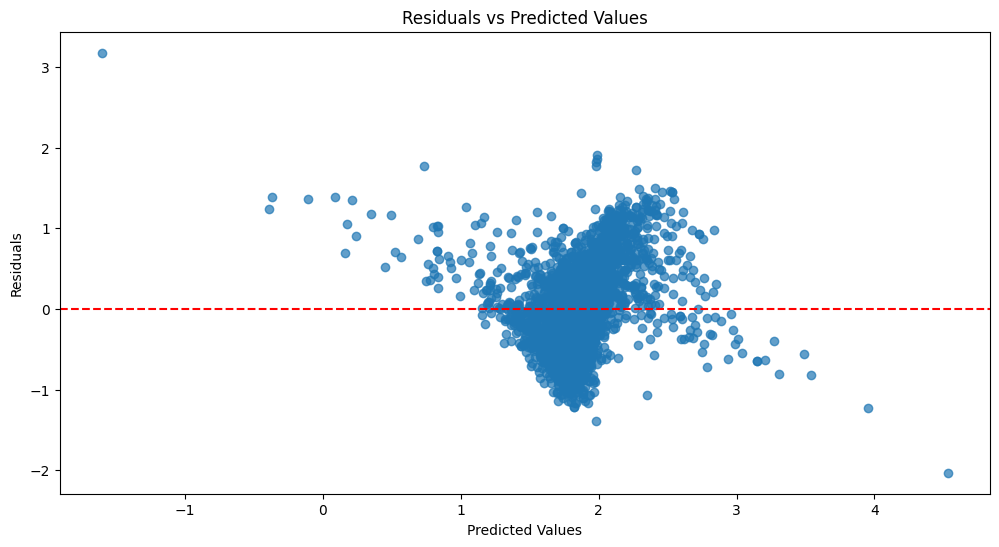

In [31]:
# Residuals vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [32]:
# --- PIPELINE 2: RANDOM FOREST ---
pipeline_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)), 
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))
])

In [33]:
print("\nTreinando o modelo RandomForestRegressor...")
pipeline_rf.fit(X_train, y_train)
print("Modelo RandomForestRegressor treinado com sucesso.")


Treinando o modelo RandomForestRegressor...
Modelo RandomForestRegressor treinado com sucesso.


In [34]:
# 2. Previsões e Métricas (Random Forest)
y_pred_rf = pipeline_rf.predict(X_test)
metrics_rf = {
    'Modelo': 'Random Forest',
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    'MAPE (%)': np.mean(np.abs((y_test - y_pred_rf) / (y_test + 1e-6))) * 100,
    'R²': r2_score(y_test, y_pred_rf)
}
metrics_rf_df= pd.DataFrame([metrics_rf])
metrics_rf_df

,Modelo,MAE,MSE,RMSE,MAPE (%),R²
0,Random Forest,0.06572,0.008899,0.094337,3.859115,0.979173


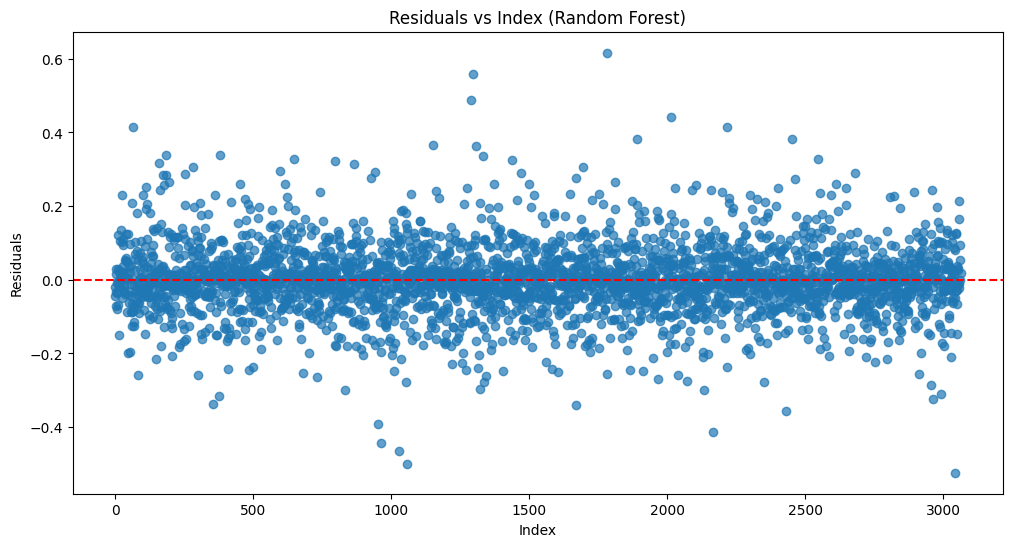

In [35]:
# Residuals para Random Forest
residuals_rf = y_test - y_pred_rf

# Plot residuals vs index para Random Forest
plt.figure(figsize=(12, 6))
plt.scatter(range(len(residuals_rf)), residuals_rf, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Index (Random Forest)')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.show()

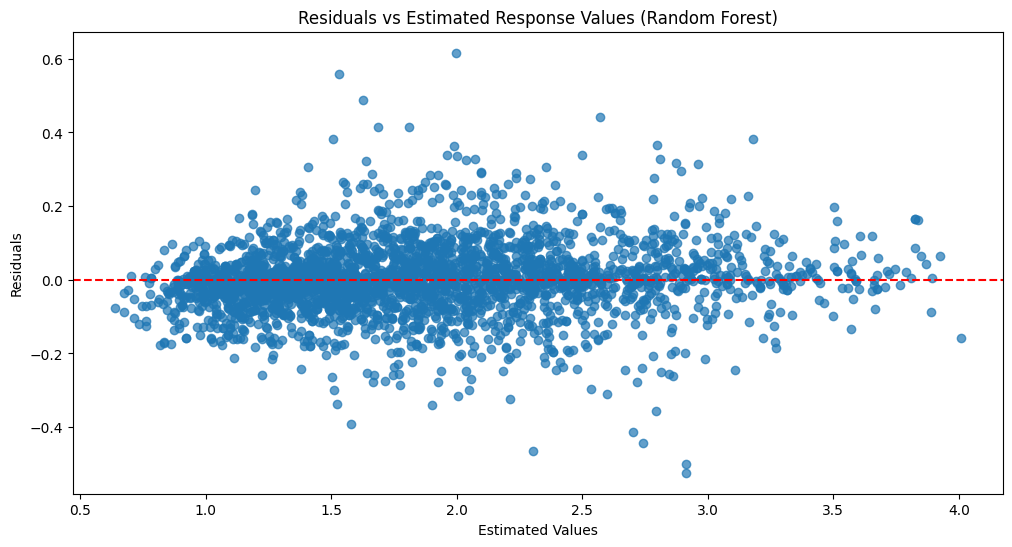

In [36]:
# Residuals vs estimated response values para Random Forest
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_rf, residuals_rf, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Estimated Response Values (Random Forest)')
plt.xlabel('Estimated Values')
plt.ylabel('Residuals')
plt.show()

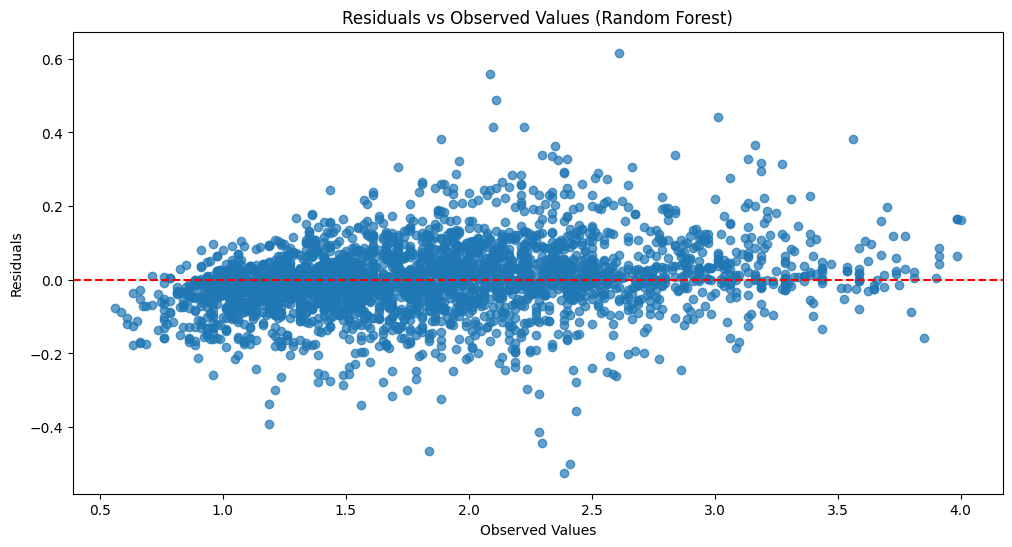

In [37]:
# Residuals vs observations (actual values) para Random Forest
plt.figure(figsize=(12, 6))
plt.scatter(y_test, residuals_rf, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Observed Values (Random Forest)')
plt.xlabel('Observed Values')
plt.ylabel('Residuals')
plt.show()